In [2]:
# Faster RCNN testing——2022.03.18
#import tensorflow.compat.v1 as tf
#tf.compat.v1.disable_eager_execution()
import tensorflow as tf
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.patches as patches # patches 用于显示图片
from PIL import Image
from matplotlib.pyplot import MultipleLocator
import time
print('Loading complete')

D:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:461: FutureWa

Loading complete


In [2]:
import imageio
#im = Image.open('x_9_0.jpg')
frame = np.load('frame1.npy')
images = []
for i in range(60):
    #images.append(im.rotate(i * 10))
    if i < 15:
        images.append(frame[i * 1, :, :, :])
    if i > 14 and i < 25:
        images.append(frame[i * 2, :, :, :])
    if i > 24 and i < 32:
        images.append(frame[i * 3, :, :, :])
    if i > 31 and i < 35:
        images.append(frame[i * 4, :, :, :])
    if i > 34 and i < 40:
        images.append(frame[i * 5, :, :, :])
    if i > 39 and i < 45:
        images.append(frame[i * 8, :, :, :])
    if i > 44 and i < 50:
        images.append(frame[i * 16, :, :, :])
    if i > 49 and i < 55:
        images.append(frame[i * 32, :, :, :])
    if i > 54:
        images.append(frame[i * 60, :, :, :])
imageio.mimsave('example5.gif', images, 'GIF', duration = 0.2)
print(len(images))

Lossy conversion from float32 to uint8. Range [-0.061795711517333984, 0.06747432053089142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.052165936678647995, 0.06890802830457687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.04611784592270851, 0.06988894194364548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.04256806895136833, 0.07195825129747391]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.047003231942653656, 0.07327791303396225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.036372192203998566, 0.08346137404441833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0347957387

60


(1, 1000, 1000, 1)
[[380 270 690 580]]
1 0.8129713423831071
2 0.8132301580577442
3 0.8508123508123508
4 0.8345011678345011
5 0.8133162708419587
6 0.8509529395926688
7 0.8902784332232185
8 0.8732106339468303
9 0.8346225660176047
10 0.8132301580577442
11 0.8509529395926688
12 0.8903312663987185
13 0.9314765694076039
14 0.9136189481017067
15 0.8732451955840261
16 0.8345894750883746
17 0.8129713423831071
18 0.8508123508123508
19 0.8902784332232185
20 0.9314765694076039
21 0.9745233399079553
22 0.9558404558404558
23 0.9136008918617614
24 0.8731587561374795
25 0.8344017094017094
26 0.8345011678345011
27 0.8732106339468303
28 0.9136189481017067
29 0.9558404558404558
30 0.9375157470395565
31 0.8960859706201321
32 0.8564191634100449
33 0.8184051398337112
34 0.8346225660176047
35 0.8732451955840261
36 0.9136008918617614
37 0.8960859706201321
38 0.8564870182477528
39 0.8185731276784535
40 0.8345894750883746
41 0.8731587561374795
42 0.8564191634100449
43 0.8185731276784535
44 0.8344017094017094
45

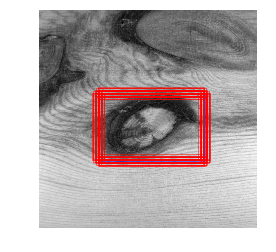

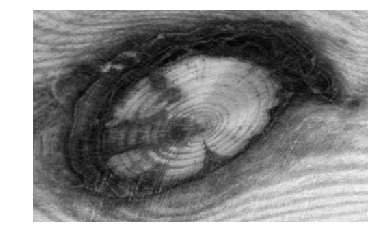

In [6]:
def ReLU(x):
    y = np.maximum(0, x)
    return y
def IoU_cmp(c1, c2):
    # c1, c2 are coordinates of two boxes
    a1 = ReLU(c2[0, 2] - c1[0, 0]) * ReLU(c2[0, 3] - c1[0, 1])
    a2 = ReLU(c1[0, 2] - c2[0, 0]) * ReLU(c1[0, 3] - c2[0, 1])
    a3 = ReLU(c1[0, 2] - c2[0, 0]) * ReLU(c2[0, 3] - c1[0, 1])
    a4 = ReLU(c2[0, 2] - c1[0, 0]) * ReLU(c1[0, 3] - c2[0, 1])
    a5 = ReLU(c1[0, 2] - c1[0, 0]) * ReLU(c1[0, 3] - c1[0, 1]) # area of c1
    a6 = ReLU(c2[0, 2] - c2[0, 0]) * ReLU(c2[0, 3] - c2[0, 1]) # area of c2
    a = np.array([a1, a2, a3, a4, a5, a6])
    y1 = a.min()
    y2 = a.max()
    y3 = y1 / y2
    return a1, a2, a3, a4, a5, a6, y3
#fig = plt.figure()
#ax = plt.axis()
p1 = mpimg.imread('E:\文件管理\木材工业研究所\manuscript-2020.05.27\待测图像2\wood_image2.jpg')
p1 = p1[:, 600:1600]
x_train = p1.reshape((1, 1000, -1, 1))
val = x_train.shape
print(val)
c = 490
r = 310
m = 380
n = 270

fig, ax = plt.subplots(1)
plt.imshow(p1, cmap = 'gray')
rect = plt.Rectangle((n, m), c, r, fill = False, linewidth = 0.5, edgecolor = 'blue')
ax.add_patch(rect)
gt = np.array([[m, n, m + r, n + r]])
print(gt)
k = 0
for i in range(50):
    m1 = i * 7 + m - 100
    for j in range(50):
        n1 = j * 7 + n - 100
        b = np.array([[m1, n1, m1 + r, n1 + r]])
        ratio = IoU_cmp(gt, b)
        if ratio[6] > 0.8:
            rect = plt.Rectangle((n1, m1), c, r, fill = False, linewidth = 0.5, edgecolor = 'red')
            k = k + 1
            print(k, ratio[6])
            if k == 1:
                ass = b
            if k > 1:
                ass = np.concatenate((ass, b), 0)
            #print(ass.shape, b[0, :].shape)
            ax.add_patch(rect)
            
print(ass.shape)
plt.axis('off') # 不显示坐标轴
plt.margins(0, 0)
plt.savefig('test.jpg',bbox_inches='tight', dpi = 300 ,pad_inches = 0.0)
plt.show()
#ratio = IoU_cmp(b1, b2)
#print(ratio)

gt = p1[m:m + r, n:n + c]
plt.imshow(gt, cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

In [11]:
Z_dim = 100
print(val)
ass_new = (ass / 4).astype(np.int)
print(ass_new)
print(ass)

(1, 1000, 1000, 1)
[[ 87  67 165 144]
 [ 89  65 166 142]
 [ 89  67 166 144]
 [ 89  68 166 146]
 [ 91  63 168 141]
 [ 91  65 168 142]
 [ 91  67 168 144]
 [ 91  68 168 146]
 [ 91  70 168 148]
 [ 92  61 170 139]
 [ 92  63 170 141]
 [ 92  65 170 142]
 [ 92  67 170 144]
 [ 92  68 170 146]
 [ 92  70 170 148]
 [ 92  72 170 149]
 [ 94  60 172 137]
 [ 94  61 172 139]
 [ 94  63 172 141]
 [ 94  65 172 142]
 [ 94  67 172 144]
 [ 94  68 172 146]
 [ 94  70 172 148]
 [ 94  72 172 149]
 [ 94  74 172 151]
 [ 96  61 173 139]
 [ 96  63 173 141]
 [ 96  65 173 142]
 [ 96  67 173 144]
 [ 96  68 173 146]
 [ 96  70 173 148]
 [ 96  72 173 149]
 [ 96  74 173 151]
 [ 98  63 175 141]
 [ 98  65 175 142]
 [ 98  67 175 144]
 [ 98  68 175 146]
 [ 98  70 175 148]
 [ 98  72 175 149]
 [ 99  65 177 142]
 [ 99  67 177 144]
 [ 99  68 177 146]
 [ 99  70 177 148]
 [101  67 179 144]
 [101  68 179 146]]
[[350 268 660 578]
 [357 261 667 571]
 [357 268 667 578]
 [357 275 667 585]
 [364 254 674 564]
 [364 261 674 571]
 [364 268 6

In [12]:
############## kernel module #############
# func: inception creation
def inception_unit(inls, outls, a1, a2, a3):
    # inls-number of input layers
    # outls-number of output layers
    out1 = int(outls * a1)
    out2 = int(outls * a2)
    out3 = int(outls * a3)
    out4 = outls - out1 -  out2 - out3
    v = [0 for i in range(8)] # initiate a list of 8 elements
    v[0] = tf.Variable(tf.truncated_normal((1, 1, inls, out1), stddev = 0.1), dtype = tf.float32, name = 'v0') # 1x1
    v[1] = tf.Variable(tf.truncated_normal((1, 1, inls, int(out2 / 2)), stddev = 0.1), dtype = tf.float32, name = 'v1') # 3x3
    v[2] = tf.Variable(tf.truncated_normal((3, 3, int(out2 / 2), out2), stddev = 0.1), dtype = tf.float32, name = 'v2')
    v[3] = tf.Variable(tf.truncated_normal((1, 1, inls, int(out3 / 2)), stddev = 0.1), dtype = tf.float32, name = 'v3') # 5x5
    v[4] = tf.Variable(tf.truncated_normal((5, 5, int(out3 / 2), out3), stddev = 0.1), dtype = tf.float32, name = 'v4')
    v[5] = tf.Variable(tf.truncated_normal((1, 1, inls, out4), stddev = 0.1), dtype = tf.float32, name = 'v5') # maxpool
    v[6] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v6')
    v[7] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v7')
    # data counting
    for i in range(len(v)):
        sh = v[i].shape
        for j in range(len(sh)):
            if j == 0:
                acm = sh[j]
            if j > 0:
                acm = sh[j] * acm
        if i == 0:
            ttl = acm
        if i > 0:
            ttl = ttl + acm
    print('inception unit data:', ttl)
    return v

# func: residual network unit creation(for generation network)
def residual_unit_G(inls, outls, win):
    # inls-number of input layers
    # outls-number of output layers
    v = [0 for i in range(15)] # initiate a list of 15 elements
    v[0] = tf.Variable(tf.truncated_normal((1, 1, int(outls / 4), inls), stddev = 0.1), dtype = tf.float32, name = 'v0')
    v[1] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v1')
    v[2] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v2')
    v[3] = tf.Variable(tf.truncated_normal((win, win, outls, int(outls / 4)), stddev = 0.1), dtype = tf.float32, name = 'v3')
    v[4] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v4')
    v[5] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v5')
    v[6] = tf.Variable(tf.truncated_normal((1, 1, int(outls / 4), outls), stddev = 0.1), dtype = tf.float32, name = 'v6')
    v[7] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v7')
    v[8] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v8')
    v[9] = tf.Variable(tf.truncated_normal((3, 3, int(outls / 4), int(outls / 4)), stddev = 0.1), dtype = tf.float32, name = 'v9')
    v[10] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v10')
    v[11] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v11')
    v[12] = tf.Variable(tf.truncated_normal((1, 1, outls, int(outls / 4)), stddev = 0.1), dtype = tf.float32, name = 'v12')
    v[13] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v13')
    v[14] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v14')
    # data counting
    for i in range(len(v)):
        sh = v[i].shape
        for j in range(len(sh)):
            if j == 0:
                acm = sh[j]
            if j > 0:
                acm = sh[j] * acm
        if i == 0:
            ttl = acm
        if i > 0:
            ttl = ttl + acm
    print('residual unit data:', ttl)
    return v
# func: convolutional layer creation
def convolutional_unit(inls, outls, win):
    # inls-number of input layers
    # outls-number of output layers
    v = [0 for i in range(3)] # initiate a list of 3 elements
    v[0] = tf.Variable(tf.truncated_normal((win, win, inls, outls), stddev = 0.1), dtype = tf.float32, name = 'v0')
    v[1] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v1')
    v[2] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v2')
    # data counting
    for i in range(len(v)):
        sh = v[i].shape
        for j in range(len(sh)):
            if j == 0:
                acm = sh[j]
            if j > 0:
                acm = sh[j] * acm
        if i == 0:
            ttl = acm
        if i > 0:
            ttl = ttl + acm
    print('convolutional unit data:', ttl)
    return v
# func: convolutional layer creation(trans)
def convolutional_unit_trans(inls, outls, win):
    # inls-number of input layers
    # outls-number of output layers
    v = [0 for i in range(3)] # initiate a list of 3 elements
    v[0] = tf.Variable(tf.truncated_normal((win, win, inls, outls), stddev = 0.1), dtype = tf.float32, name = 'v0')
    v[1] = tf.Variable(tf.constant(0.01, shape = [inls]), dtype = tf.float32, name = 'v1')
    v[2] = tf.Variable(tf.constant(0.01, shape = [inls]), dtype = tf.float32, name = 'v2')
    # data counting
    for i in range(len(v)):
        sh = v[i].shape
        for j in range(len(sh)):
            if j == 0:
                acm = sh[j]
            if j > 0:
                acm = sh[j] * acm
        if i == 0:
            ttl = acm
        if i > 0:
            ttl = ttl + acm
    print('convolutional unit data:', ttl)
    return v
def convolutional_single(inls, outls, win):
    # inls-number of input layers
    # outls-number of output layers
    v = [0 for i in range(1)] # initiate a list of 3 elements
    v[0] = tf.Variable(tf.truncated_normal((win, win, inls, outls), stddev = 0.1), dtype = tf.float32, name = 'v0')
    # data counting
    for i in range(len(v)):
        sh = v[i].shape
        for j in range(len(sh)):
            if j == 0:
                acm = sh[j]
            if j > 0:
                acm = sh[j] * acm
        if i == 0:
            ttl = acm
        if i > 0:
            ttl = ttl + acm
    print('convolutional unit data:', ttl)
    return v

In [13]:
# parameters initiation
X = tf.placeholder(tf.int32, shape = [None, 4])
Y = tf.placeholder(tf.float32, shape = [None, 1, 1, 2])
img = tf.placeholder(tf.float32, shape = [None, val[1], val[2], val[3]])
print('X:', X)
print('Y:', Y)
print('img:', img)
c1 = 5
c2 = 5
deep1 = 32
deep2 = int(deep1 * 2)
deep3 = int(deep2 * 2)
deep4 = int(deep3 * 2)
deep5 = int(deep4 * 2)
eps = 1e-7
cf = 7
print(eps)
## Encoder ##
print('\033[1;34;47m%s\033[0m '% 'Encoder')
print('Encoder layer 1:')
D1 = convolutional_unit(1, deep1, c1) # 72
print(len(D1))
print('Encoder layer 2:')
D2 = convolutional_unit(deep1, deep2, c1) # 36
print(len(D2))
print('Encoder layer 3:')
D3 = convolutional_single(deep2, deep3, c1) # 18
print(len(D3))
print('Encoder layer 4:')
D4 = convolutional_single(deep3, 2, 1) # 18
print(len(D4))

print(type(D1))
update_D = D1 + D2 + D3 + D4

print('total varibles:', len(update_D))
print('val', val)
time.asctime()

X: Tensor("Placeholder_3:0", shape=(?, 4), dtype=int32)
Y: Tensor("Placeholder_4:0", shape=(?, 1, 1, 2), dtype=float32)
img: Tensor("Placeholder_5:0", shape=(?, 1000, 1000, 1), dtype=float32)
1e-07
Encoder 
Encoder layer 1:
convolutional unit data: 864
3
Encoder layer 2:
convolutional unit data: 51328
3
Encoder layer 3:
convolutional unit data: 204800
1
Encoder layer 4:
convolutional unit data: 256
1
<class 'list'>
total varibles: 8
val (1, 1000, 1000, 1)


'Fri Mar 18 23:26:01 2022'

In [14]:
# parameters loading
X = tf.placeholder(tf.float32, shape = [None, 4])

c1 = 5
c2 = 5
par = np.load('parameter_224.npy', allow_pickle = True)
print(len(par))
print(type(par))
print(par.shape)
print(par[1])
eps = 1e-7
print(eps)
## Encoder ##
print('\033[1;34;47m%s\033[0m '% 'Encoder')
print('Encoder layer 1:')
E1 = [par[0], par[1], par[2]] # 112
print(len(E1))
print('Encoder layer 2:')
E2 = [par[3], par[4], par[5]] # 56
print(len(E2))
print('Encoder layer 3:')
E3 = [par[6], par[7], par[8]] # 28
print(len(E3))
print('Encoder layer 4:')
E4 = [par[9], par[10], par[11]] # 14
print(len(E4))
print('Encoder layer 5:')
E5 = [par[12], par[13], par[14]] # 7
print(len(E5))
print('Encoder layer 6:')
E6 = [par[15]] # 1
print(len(E6))
print('Encoder layer 7:')
E7 = [par[16]] # 1
print(len(E7))
update_E = E1 + E2 + E3 + E4 + E5 + E6 + E7
print(len(update_E))

update_G = G1 + G2 + G3 + G4 + G5 + G6 + G7 + G8 + G9 + G10 + G11 + G12 + G13 + G14 + G15 + G16 + G17 + G18
update = update_E + update_G
print('total varibles:', len(update))
print('val', val)
time.asctime()

FileNotFoundError: [Errno 2] No such file or directory: 'parameter_224.npy'

In [16]:
# network construction
def inception(x, W, name_in):
    ## Branch: 1x1 ##
    y1 = tf.nn.conv2d(x, W[0], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: 3x3 ##
    y = tf.nn.conv2d(x, W[1], strides = [1, 1, 1, 1], padding = "SAME")
    y3 = tf.nn.conv2d(y, W[2], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: 5x5 ##
    y = tf.nn.conv2d(x, W[3], strides = [1, 1, 1, 1], padding = "SAME")
    y5 = tf.nn.conv2d(y, W[4], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: maxpool ##
    y = tf.nn.max_pool(x, ksize = [1, 3, 3, 1], strides = [1, 1, 1, 1], padding = "SAME") # maxpool
    ymax = tf.nn.conv2d(y, W[5], strides = [1, 1, 1, 1], padding = "SAME")
    #print(y1.shape, y3.shape, y5.shape, ymax.shape)
    y = tf.concat((y1, y3, y5, ymax), 3, name_in)
    ## Activation ##
    m, v = tf.nn.moments(y, [0])
    sd = W[6] * (y - m) / tf.pow((v + eps), 0.5) + W[7]
    y = tf.nn.relu(sd, name_in)
    #print(d)
    return y

def convolution2D(x, W, srd, pad, name_in):
    y = tf.nn.conv2d(x, W[0], strides = [1, srd, srd, 1], padding = pad)
    m, v = tf.nn.moments(y, [0])
    sd = W[1] * (y - m) / tf.pow((v + eps), 0.5) + W[2]
    d = tf.nn.relu(sd, name_in)
    return d

def convolution2D_trans(x, W, srd, pad, name_in):
    y = tf.nn.conv2d_transpose(x, W[0], output_shape=[tf.shape(x)[0],int(x.shape[1]*srd),int(x.shape[2]*srd),W[0].shape[2]],strides=[1,srd,srd,1],padding = pad) # 4x4
    m, v = tf.nn.moments(y, [0, 1])
    sd = W[1] * (y - m) / tf.pow((v + eps), 0.5) + W[2]
    d = tf.nn.relu(sd, name_in)
    return sd

def discriminator(img, x):
    ## encoder: 1 ##
    y = convolution2D(img, D1, 1, 'SAME', 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd1')
    print(d)
    ## encoder: 2 ##
    y = convolution2D(d, D2, 1, 'SAME', 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd2')
    print(d)
    ## encoder: 3 ##
    y = tf.nn.conv2d(d, D3[0], strides = [1, 1, 1, 1], padding = 'SAME')
    print(y)
    xs = x.shape
    for i in range(xs[0]):
        m1 = x[i, 0]
        m2 = x[i, 2]
        n1 = x[i, 1]
        n2 = x[i, 3]
        tar = y[:, m1:m2, n1:n2, :] # target feature map
        ys = tar.shape
        t = tf.nn.avg_pool(tar, ksize = [1, ys[1], ys[2], 1], strides = [1, 1, 1, 1], padding = 'VALID', name = 'd3')
        if i == 0:
            d = t
        if i > 0:
            d = tf.concat([d, t], 0)
    print(d)
    ## encoder: 4 ##
    y = tf.nn.conv2d(d, D4[0], strides = [1, 1, 1, 1], padding = 'VALID')
    print(y)
    d = tf.nn.softmax(y, name = 'prediction')
    print(d)
    return d


#噪声产生的函数
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size = [m, 1, 1, n])

#产生随机序列号
def rand_array(Lv, Hv, num):
    sample = np.arange(Lv, Hv + 1, 1) #生成Lv到Hv的等差数列(Hv - Lv个数)
    output = np.random.rand(1, num)   #初始化输出数列
    for i in range(num):
        #print(i)
        val = np.random.rand(1) * (Hv - Lv + 1 - i)
        ind = int(np.floor(val))
        #print(val, ind, sample[ind])
        output[0, i] = sample[ind] #赋值
        sample = np.delete(sample, ind) #删除当前序号中的值
    return output

def array_assign(x, index): # 以index为依据重新分配x的元素
    y = np.zeros(x.shape, dtype = np.float32)
    for i in range(x.shape[0]):
        n = int(index[0, i])
        y[i, :, :, :] = x[n, :, :, :]
    return y

In [17]:
D_pre = discriminator(img, ass_new)
print('D_pre:', D_pre)
print('X:', X)

#优化式
D_loss = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(D_pre), reduction_indices = [3]), name = 'D_loss') #D_loss 判断的损失
print(D_loss)

#训练
D_solver = tf.train.GradientDescentOptimizer(1e-3).minimize(D_loss)
#D_solver = tf.train.AdamOptimizer(1e-3).minimize(D_loss, var_list = update)
## 初始化 ##
sess = tf.Session()
sess.run(tf.global_variables_initializer())

N = 0 # for counting
cnt = 0
print('\033[5;31;47m%s\033[0m '% 'Ready for training!')

Tensor("d1:0", shape=(?, 500, 500, 32), dtype=float32)
Tensor("d2:0", shape=(?, 250, 250, 64), dtype=float32)
Tensor("Conv2D_2:0", shape=(?, 250, 250, 128), dtype=float32)
Tensor("concat_43:0", shape=(?, 1, 1, 128), dtype=float32)
Tensor("Conv2D_3:0", shape=(?, 1, 1, 2), dtype=float32)
Tensor("prediction:0", shape=(?, 1, 1, 2), dtype=float32)
D_pre: Tensor("prediction:0", shape=(?, 1, 1, 2), dtype=float32)
X: Tensor("Placeholder_6:0", shape=(?, 4), dtype=float32)
Tensor("D_loss:0", shape=(), dtype=float32)
Ready for training! 


In [18]:
# Training
s0 = time.clock()
s1 = time.clock()
for it in range(10):
    N = N + 1
    y_train = np.zeros([45, 1, 1, 2], dtype = np.float32)
    y_train[:, :, :, 0] = 1
    result = sess.run([D_solver, D_loss], feed_dict = {img: x_train, Y: y_train}) # VAE训练
    #if N == 1:
        #res = result[1] 
    #if N > 1:
        #res = np.concatenate((res, result[1]), 0)
    if N % 1 == 0:
        print('Iter:', it + 0)
        print('No.: {}'.format(N))
        print('D_loss: {:.4}'.format(result[1]))
        s2 = time.clock()
        print("Time used:", s2 - s1)
        s1 = time.clock()
s3 = time.clock()
if cnt == 0:
    ttm = (s3 - s0) / 60
if cnt > 0:
    ttm = ttm + (s3 - s0) / 60
print("Time used(min):", (s3 - s0) / 60)
print("Total time(min):", ttm)
cnt =cnt + 1

rs = res.shape
print("res:", rs)

# ploting
axis_x = np.arange(1, rs[0] + 1, 1)
axis_y = r_w
#print(axis_x.shape, axis_y.shape)
plt.plot(axis_x, axis_y)
if rs[0] < 101:
    interval = 10
if rs[0] > 100:
    interval = 50
if rs[0] > 500:
    interval = 100
if rs[0] > 1000:
    interval = 200
if rs[0] > 5000:
    interval = 500
if rs[0] > 10000:
    interval = 1000
print('interval', interval)
x_major_locator = MultipleLocator(interval)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
#plt.xticks(axis_x) #
plt.show()

Iter: 0
No.: 1
D_loss: 0.6778
Time used: 8.5269287
Iter: 1
No.: 2
D_loss: 0.673
Time used: 7.231705
Iter: 2
No.: 3
D_loss: 0.6681
Time used: 7.275428100000001
Iter: 3
No.: 4
D_loss: 0.6633
Time used: 7.248160300000002
Iter: 4
No.: 5
D_loss: 0.6586
Time used: 7.1611772999999985
Iter: 5
No.: 6
D_loss: 0.6539
Time used: 7.068097800000004
Iter: 6
No.: 7
D_loss: 0.6492
Time used: 7.0737549999999985
Iter: 7
No.: 8
D_loss: 0.6446
Time used: 7.203592899999997
Iter: 8
No.: 9
D_loss: 0.64
Time used: 7.258873499999993
Iter: 9
No.: 10
D_loss: 0.6355
Time used: 6.962471499999992
Time used(min): 1.2168515299999998
Total time(min): 1.2168515299999998


NameError: name 'res' is not defined

In [13]:
# model samving
result = sess.run(update) # discriminator训练
print(len(result))
print(result[1].shape)
print(result[1])
np.save('parameter_224', result, allow_pickle = True)

69
(32,)
[0.00432021 0.01824768 0.00826284 0.00812993 0.00671798 0.01553505
 0.0188533  0.00974807 0.01849305 0.01121977 0.01229156 0.01114106
 0.01969187 0.01873507 0.00879546 0.00395059 0.0070151  0.00461143
 0.01242468 0.01483482 0.00733485 0.01773105 0.01188426 0.00530332
 0.00781462 0.02584527 0.01558827 0.01300772 0.01710611 0.0106208
 0.00715892 0.00738834]


D:\program\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [20]:
np.save('frame4', frame)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.83646286 -0.49968687
-0.49968687


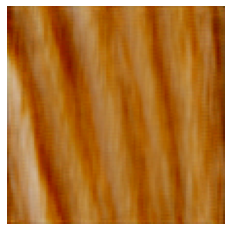

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


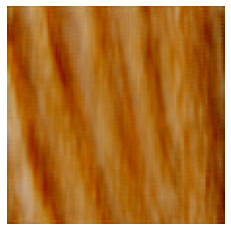

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


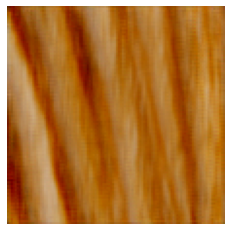

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


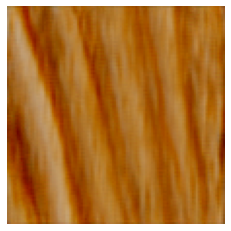

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


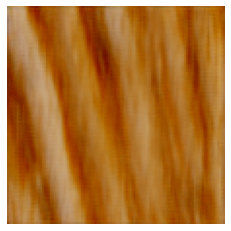

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


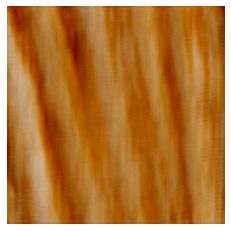

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


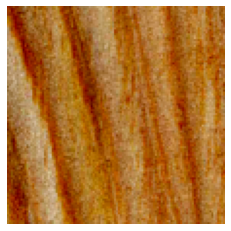

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


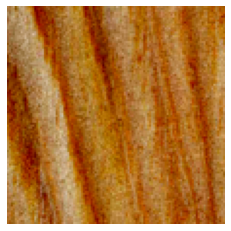

In [21]:
#print(samples[0])
print(np.max(samples), np.min(samples))
print(samples.min())

plt.imshow((samples[0, :, :, :] + 0.0) / 1.) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow((samples[1, :, :, :] + 0.0) / 1.) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow((samples[2, :, :, :] + 0.0) / 1.) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow((samples[3, :, :, :] + 0.0) / 1.) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow((samples[4, :, :, :] + 0.0) / 1.) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow((samples[8, :, :, :] + 0.0) / 1.) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
m1 = 71
n1 = 271
plt.imshow((x_train[1, :, :, :] + 0.0) / 1.) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow((x_train[100, :, :, :] + 0.0) / 1.) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

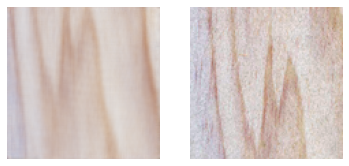

In [39]:
pic = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow((samples[3, :, :, :] + 0.0) / 1.) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.subplot(1, 2, 2)
plt.imshow((fig2[m1:m1 + 112, n1:n1 + 112, :] + 0.0) / 1.) # 显示图片
plt.axis('off') # 不显示坐标轴

plt.savefig('assemble2.jpg', bbox_inches = 'tight')
plt.show()

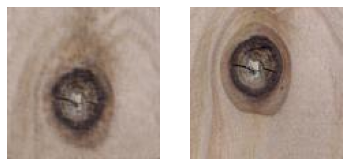

In [38]:
p1 = Image.open('numwood3.jpg')
p2 = Image.open('realwood1.jpg')
pic = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(p1) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.subplot(1, 2, 2)
plt.imshow(p2) # 显示图片
plt.axis('off') # 不显示坐标轴

plt.savefig('assemble1.jpg', bbox_inches = 'tight')
plt.show()

In [28]:
import matplotlib
matplotlib.image.imsave('numwood_20210923_1.jpg', (samples[3, :, :, :] + 0.0) / 1.)

In [29]:
import matplotlib
matplotlib.image.imsave('realwood2.jpg', (fig2[m1:m1 + 112, n1:n1 + 112, :] + 0.0) / 1.)

In [22]:
## 模型保存 ##
saver = tf.train.Saver()
trainResultPath = 'E:\pythonworkspace\image_generation\model4_straight/f1'
print('saving...')
saver.save(sess, trainResultPath)

saving...


'E:\\pythonworkspace\\image_generation\\model4_straight/f1'

In [9]:
## 模型加载 ##
saver = tf.train.Saver()
trainResultPath = 'E:/pythonworkspace/model20210923/f1'
saver.restore(sess, trainResultPath)# 加载到当前环境中

INFO:tensorflow:Restoring parameters from E:/pythonworkspace/model20210923/f1


In [18]:
logdir = 'E:/pythonworkspace/log'
writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
writer.close()